# Support Vector Classifier

Each of the models that we trained were tested on multiple sets of features. For this model, we did reserach to find if we can use some code to figure out what the important features are for this dataset. We found that we can use the ExtraTrees classifier to see the important features. We trained that classifer with all of the features from the training data text file. This gave the results that size, current ratio, quick ratio, total margin, return on equity, net working capital, return on assets, long-term debt to equity, Equity financing ratio, and debt ratio are the 10 most important from least to greatest. This can be seen in the graph below.

(4776, 34)
(4776,)
[0.03082576 0.00820808 0.01856382 0.05683404 0.05437903 0.02921138
 0.01805755 0.02568616 0.01970435 0.01634883 0.05271972 0.0300252
 0.05028462 0.03783565 0.03094975 0.01360231 0.01990338 0.02427402
 0.02040781 0.06423302 0.02160039 0.08854552 0.01805014 0.01796623
 0.01366372 0.01927131 0.07749623 0.01616234 0.01906992 0.01624271
 0.0174837  0.0129231  0.01528231 0.02418791]


/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


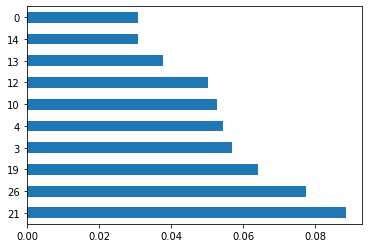

In [5]:
import numpy as np # linear algebra
from sklearn.preprocessing import StandardScaler
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
xTrainData = np.genfromtxt("data/X_train.txt", delimiter = None, skip_header=1)
yTrainData = np.genfromtxt("data/Y_train.txt", delimiter = None, skip_header=1)
X = xTrainData[:,1:35]  #independent columns
print(X.shape)
y = yTrainData[:,1]    #target column i.e price range
print(y.shape)

scale = StandardScaler().fit(X)
xTrainScaled = scale.transform(X)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(xTrainScaled,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The training data from the text file was split into 75% training data and 25% validation data. The training data was then balanced using over sampling. The training and test data were also scaled. The SVC model was trained on the 75% split. The SVC also had different options for the kernel function. Sci-kit learn gave the options to have a linear, poly, rbf and sigmoid. The one that worked the best for us was the sigmoid kernel function. To figure out which kernel function worked the best we looked at the confusion matrix and the score. 

## Best Performer

Our best performer was the Support Vector classifier with the sigmoid kernel function. For our best prediction we used 10 features from the data. A Support vector Machine worked well for this since they tend to be effective for high dimensional spaces. With sci-kit learn the prediction probability function also ran the training through cross-validation making the model more accurate and precise. For Support Vector Machines, it maximizes the margin between the two classes, in this case its whether the hospital is in financial distress or not. On top of that, we trained the data with a sigmoid kernel function which would help the model train more effectively by adding curves to the decision boundries. The margins between the support vectors were not just linear. We could not graph 10 features together, but the data most likely was shaped in a way where finding the maximal margin for the decision boundry separated the data enough to make accurate predictions. 

### Code

In [ ]:
xTrainImp = xTrain[:,[1,4,5,11,13,8,14,22,20,27]]
xValImp = xVal[:,[1,4,5,11,13,8,14,22,20,27]]
xTestImp = xTestData[:,[1,4,5,11,13,8,14,22,20,27]]
xTrainBal, yTrainBal = sm.fit_sample(xTrainImp, yTrainDist.ravel())

scale = StandardScaler().fit(xTrainBal)
xTrainScaled = scale.transform(xTrainBal)
xTestScaled = scale.transform(xTestImp)

svc = svm.SVC(kernel="sigmoid", probability=True)
svc.fit(xTrainScaled, yTrainBal)
probs = svc.predict_proba(xTestScaled)